In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set seed
np.random.seed(0)

# Root Variables
PROJECT_ROOT = "/content/drive/Shareddrives/STAT-204/"
IMAGES_ROOT = os.path.join(PROJECT_ROOT, "Images")
DATA_ROOT = os.path.join(PROJECT_ROOT, "Data")

In [4]:
train = pd.read_csv(os.path.join(DATA_ROOT, "training/train_V2.csv"))
train = train[(train.matchType != "crashfpp") & (train.matchType != "flaretpp") & (train.matchType != "flarefpp") & (train.matchType != "crashtpp")]

In [5]:
def fix_match_type(string):
  if string in ["duo", "squad", "solo", "solo-fpp", "duo-fpp", "squad-fpp"]:
    return string
  elif string == "normal-squad-fpp":
    return "squad-fpp"
  elif string == "normal-solo-fpp":
    return "solo-fpp"
  elif string == "normal-duo-fpp":
    return "duo-fpp"
  elif string == "normal-duo":
    return "duo"
  elif string == "normal-squad":
    return "squad"
  elif string == "normal-solo":
    return "solo"

train.matchType = train.matchType.apply(fix_match_type)

In [6]:
def kills_cat(value):
    if value==0:
      return '0_kills'
    elif value>0 and value<=2:
      return '1-2_kills'
    elif value>=3 and value<=5:
      return '3-5_kills'
    elif value>=6 and value<=10:
      return '6-10_kills'
    else:
      return '10+_kills'

train["kill_category"] = train.kills.apply(kills_cat)

In [7]:
random_match_ids = np.random.choice(train['matchId'], size=1040, replace=False)
random_match_ids, random_match_ids_test = random_match_ids[:1000], random_match_ids[1000:]

In [8]:
# Filter out data
data = train[train['matchId'].isin(random_match_ids)]
data_test = train[train['matchId'].isin(random_match_ids_test)]
data = data.drop(['Id', 'groupId', 'matchId'], axis=1)
data_test = data_test.drop(['Id', 'groupId', 'matchId'], axis=1)
data.to_csv(os.path.join(DATA_ROOT, "training/filtered_training.csv"), index=False)
data_test.to_csv(os.path.join(DATA_ROOT, "testing/filtered_linear_regression_testing.csv"), index=False)

In [ ]:
data_for_lr = train
all_matches = data_for_lr.matchId.unique()
logistic_reg_test_set = None
match_counts = dict((matchType, 0) for matchType in data_for_lr.matchType.unique())
max_per_type_matches = 100
total_matches = max_per_type_matches * len(match_counts)
for matchId in all_matches:
  temp_df = data_for_lr[data_for_lr.matchId==matchId]
  matchType = temp_df.matchType.unique()[0]
  if match_counts[matchType] > max_per_type_matches:
    continue
  match_counts[matchType] += 1
  total = 0
  for key, value in match_counts.items():
    total += value
  print(total, end="\r")
  if total >= total_matches:
    print("Done with filtering out maximum number of matches from each category")
    break
  if isinstance(logistic_reg_test_set, type(None)):
    # if matchType in ["solo", "duo"]:
    #   logistic_reg_test_set = temp_df[0:2]
    # else:
    logistic_reg_test_set = temp_df[0:1]
  else:
    logistic_reg_test_set = pd.concat(
        [logistic_reg_test_set, temp_df[0:1] if matchType in ["solo", "duo"] else temp_df[0:1]],
        axis=0
    )

# logistic_reg_test_set = logistic_reg_test_set.drop(['Id'], axis=1)
logistic_reg_test_set.to_csv(os.path.join(DATA_ROOT, "testing/filtered_logistic_regression_testing.csv"), index=False)

In [ ]:
# Filter out data
random_match_ids = np.random.choice(train['matchId'], size=10, replace=False)
less_data = train[train['matchId'].isin(random_match_ids)]
less_data = less_data.drop(['Id', 'groupId', 'matchId'], axis=1)
less_data.to_csv(os.path.join(DATA_ROOT, "training/filtered_training_10_matches.csv"), index=False)

Now we need to filter the data to keep 100,000 rows

# EDA

1. Plotting assists,boosts,damageDealt,DBNOs

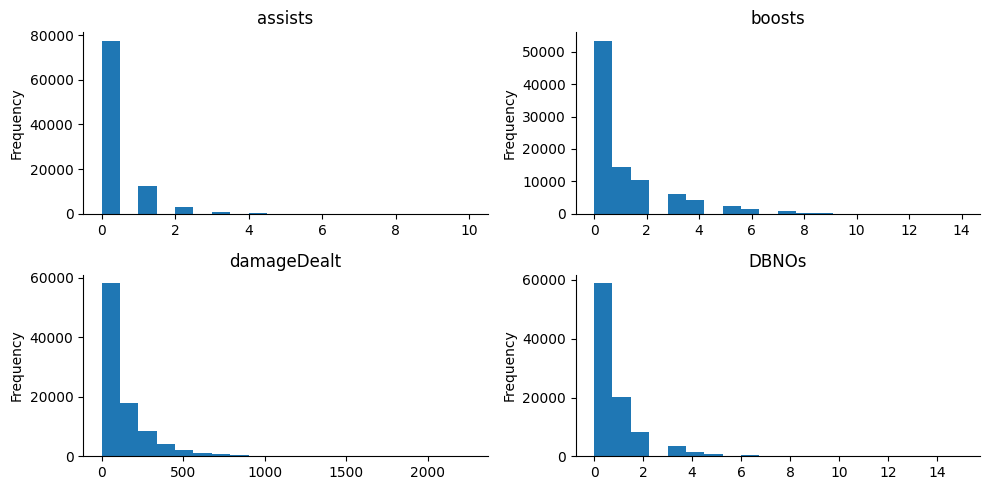

In [10]:
rows = 2
cols = 2
k=0
val = ['assists','boosts','damageDealt','DBNOs']
fig, axes = plt.subplots(rows, cols, figsize=(10, 5))
for i in range(rows):
    for j in range(cols):
        data[val[k]].plot(kind='hist', bins=20, ax=axes[i, j])
        axes[i, j].set_title(val[k])
        axes[i, j].spines[['top', 'right']].set_visible(False)
        k += 1

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()


2. Checking matchType spread

<Axes: ylabel='matchType'>

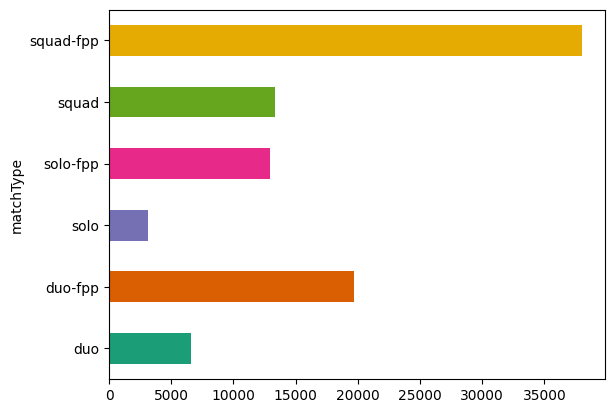

In [11]:
data.groupby('matchType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
#plt.gca().spines[['top', 'right',]].set_visible(False)

3. assists, boosts, damageDealt, DBNOs with respect to matchType

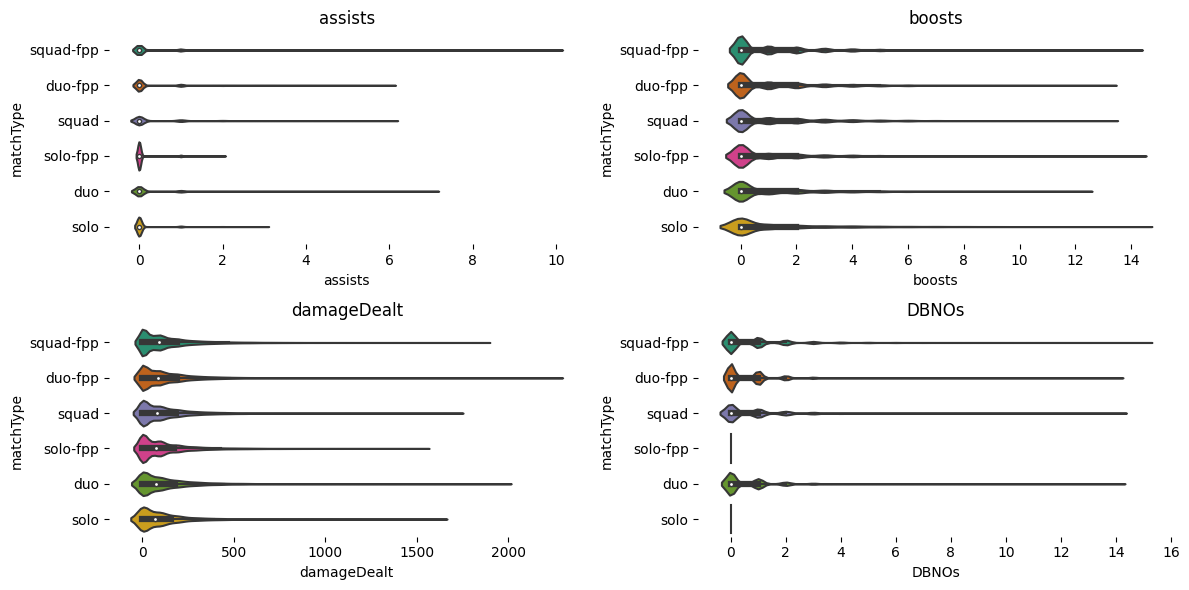

In [12]:
rows = 2
cols = 2
k=0
val = ['assists','boosts','damageDealt','DBNOs']
fig, axes = plt.subplots(rows, cols, figsize=(12, 1 * len(data['matchType'].unique())))
#figsize = (8, 1 * len(data['matchType'].unique()))
#plt.figure(figsize=figsize)
for i in range(rows):
    for j in range(cols):
        sns.violinplot(data=data, x=val[k], y='matchType', inner='box', palette='Dark2', ax=axes[i, j])
        sns.despine(top=True, right=True, left=True, bottom=True)
        axes[i, j].set_title(val[k])
        k += 1

# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plots
plt.show()


4.Plotting Kills Histogram

In [39]:
93934 - 93590
9103 - 344

8759

In [40]:
11139 + 11532 + 11303 + 10987 + 10903 + 10403 + 9321 + 9243 + 8759

93590

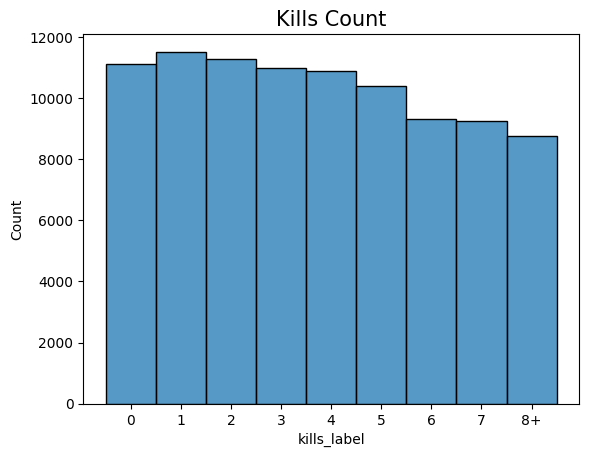

In [44]:
x = ['0'] * 11139 + ['1'] * 11532 + ['2'] * 11303 + ['3'] * 10987 + ['4'] * 10903 + ['5'] * 10403 + ['6'] * 9321 + ['7'] * 9243 + ['8+'] * 8759
sns.histplot(x = x)
plt.title("Kills Count",fontsize=15)
plt.xlabel("kills_label")
plt.savefig(os.path.join(IMAGES_ROOT, "kills_count_balanced.png"))

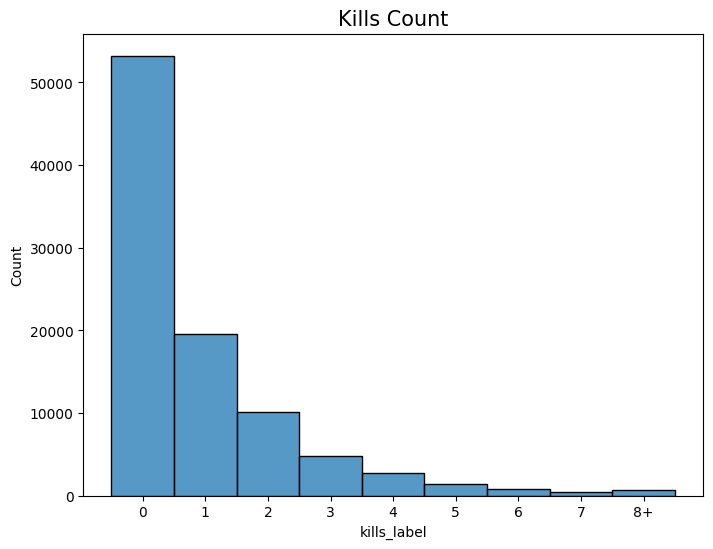

In [21]:
def label_kills(value):
    return str(value) if value < 8 else '8+'

data['kills_label'] = np.vectorize(label_kills)(data['kills'])

# Optionally, convert the column to string type
data['kills_label'] = data['kills_label'].astype(str)

#looking at kills distribution
plt.figure(figsize=(8,6))
sns.histplot(data,x=data['kills_label'].sort_values())
plt.title("Kills Count",fontsize=15)
plt.savefig(os.path.join(IMAGES_ROOT, "kills_count.png"))

5. Distribution of damage dealt for players having 0 kills

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

KeyError: ignored

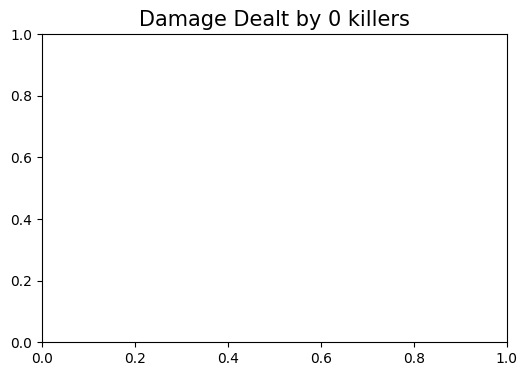

In [13]:
#looking at just 0 kills data
plt.figure(figsize=(6,4))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.violinplot(x=data[data['kills_label']=='0']['damageDealt'])
plt.savefig(os.path.join(IMAGES_ROOT, "DamageDealt.png"))

In [ ]:
print("Maximum damage dealt by players without a single kill:",data[data['kills_label']=='0']['damageDealt'].max())
print("Minimum damage dealt by players without a single kill:",data[data['kills_label']=='0']['damageDealt'].min(),"This is obvious")
print("Mean of damage dealt by players without a single kill:",data[data['kills_label']=='0']['damageDealt'].mean())
print("Median of damage dealt by players without a single kill:",data[data['kills_label']=='0']['damageDealt'].median())

Maximum damage dealt by players without a single kill: 672.3
Minimum damage dealt by players without a single kill: 0.0 This is obvious
Mean of damage dealt by players without a single kill: 40.464226225439106
Median of damage dealt by players without a single kill: 10.8


6. WinPlacePerc for 0 kills. Lets look at how kills and damageDealt impact the winPlacePerc.

In [ ]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[(data['kills_label']=='0') & (data['winPlacePerc']==1)]), 100*len(data[(data['kills_label']=='0') & (data['winPlacePerc']==1)])/len(data)))


print("{} players ({:.4f}%) have won without dealing damage!".format(len(data[(data['kills_label']=='0') & (data['winPlacePerc']==1) & (data['damageDealt']==0) ]), 100*len(data[(data['kills_label']=='0') & (data['winPlacePerc']==1) & (data['damageDealt']==0)])/len(data)))

346 players (0.3730%) have won without a single kill!
113 players (0.1218%) have won without dealing damage!


7. Now lets check kill category with the winning percentile.

<ipython-input-21-071d01e26324>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['kill_category'] = np.vectorize(kills_cat)(data['kills'])


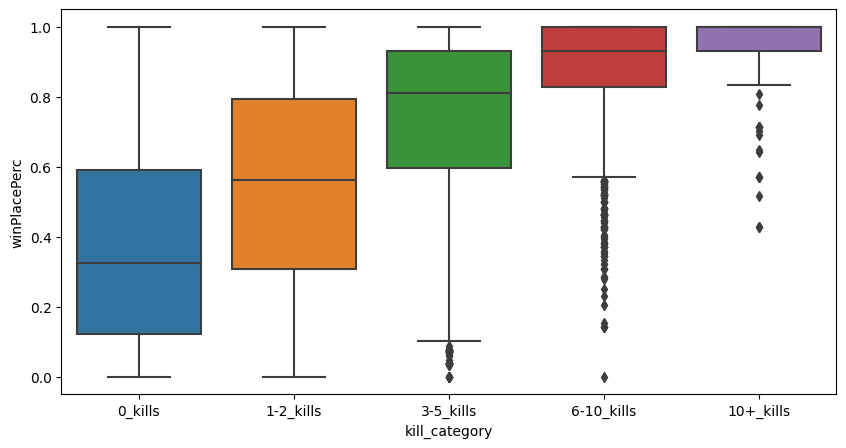

In [ ]:
data['kill_category'] = np.vectorize(kills_cat)(data['kills'])
plt.figure(figsize=(10,5))
order = ['0_kills', '1-2_kills', '3-5_kills', '6-10_kills', '10+_kills']
sns.boxplot(x="kill_category", y="winPlacePerc", data=data, order=order)
plt.show()

In [ ]:
print(abs(data.corr().winPlacePerc).sort_values(ascending=False))

winPlacePerc       1.000000
walkDistance       0.815300
killPlace          0.722781
boosts             0.636091
weaponsAcquired    0.594857
damageDealt        0.444298
heals              0.429405
kills              0.424560
longestKill        0.410773
killStreaks        0.374200
rideDistance       0.343844
assists            0.298278
headshotKills      0.284045
DBNOs              0.273236
revives            0.231151
swimDistance       0.147092
vehicleDestroys    0.077416
numGroups          0.038918
maxPlace           0.037749
roadKills          0.033433
teamKills          0.017855
killPoints         0.013315
rankPoints         0.011843
winPoints          0.008126
matchDuration      0.003799
Name: winPlacePerc, dtype: float64


<ipython-input-22-9826bbbe71cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(abs(data.corr().winPlacePerc).sort_values(ascending=False))


<ipython-input-23-66e85dc88fdd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(data.corr()))


Axes(0.125,0.11;0.62x0.77)


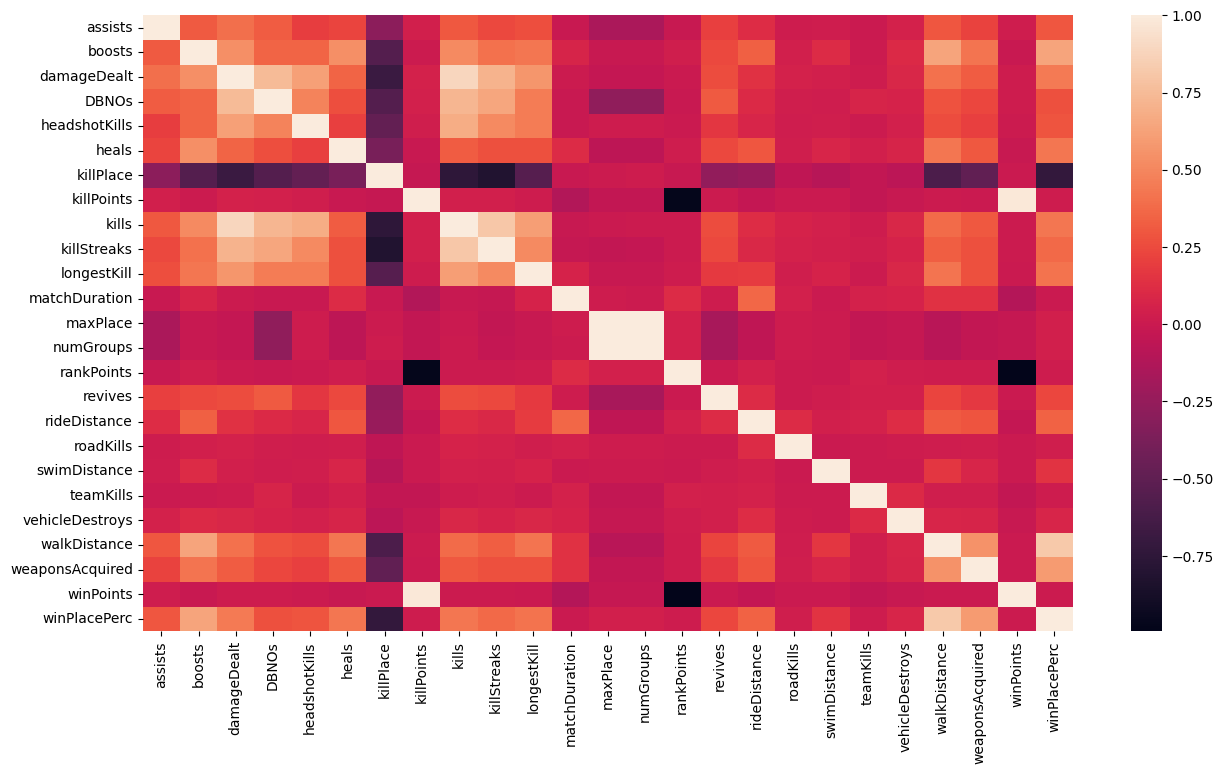

In [ ]:
plt.figure(figsize=(15,8))
print(sns.heatmap(data.corr()))


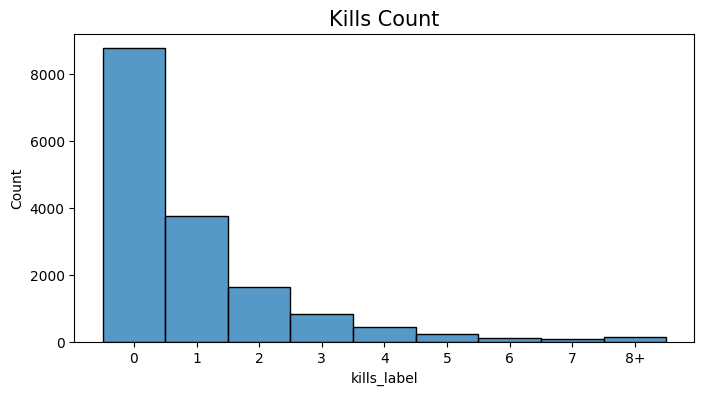

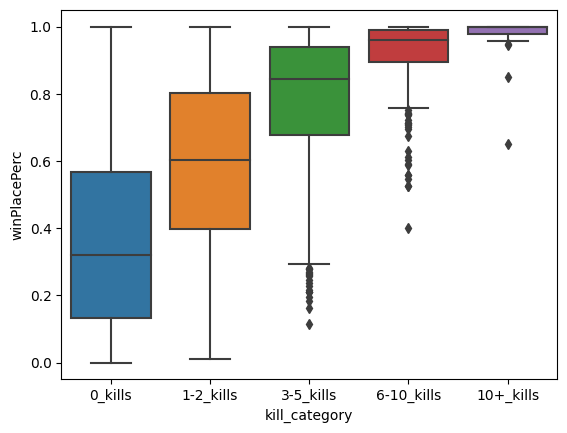

In [ ]:
solo = ["solo","solo-fpp"]
data_solo=data[data['matchType'].isin(solo) ]
duo = ["duo","duo-fpp"]
data_duo=data[data['matchType'].isin(duo) ]
squad = ["squad","squad-fpp"]
data_squad=data[data['matchType'].isin(squad) ]

plt.figure(figsize=(8,4))
sns.histplot(data_solo,x=data_solo['kills_label'].sort_values())
plt.title("Kills Count",fontsize=15)
plt.show()

sns.boxplot(x="kill_category", y="winPlacePerc", data=data_solo, order=order)
plt.show()

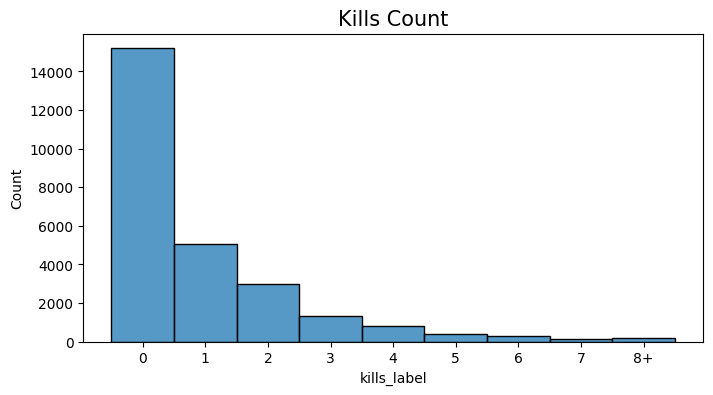

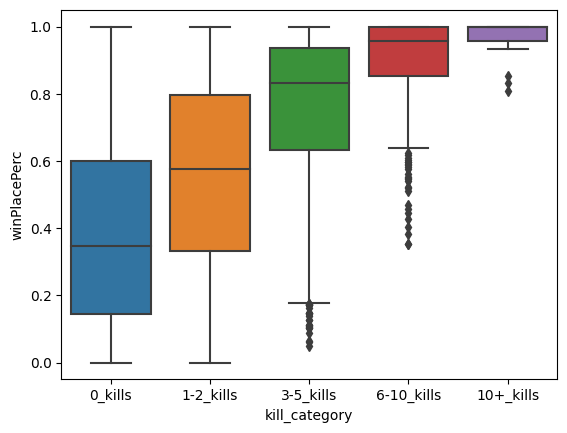

In [ ]:
duo = ["duo","duo-fpp"]
data_duo=data[data['matchType'].isin(duo) ]
plt.figure(figsize=(8,4))
sns.histplot(data_duo,x=data_duo['kills_label'].sort_values())
plt.title("Kills Count",fontsize=15)
plt.show()

sns.boxplot(x="kill_category", y="winPlacePerc", data=data_duo, order=order)
plt.show()

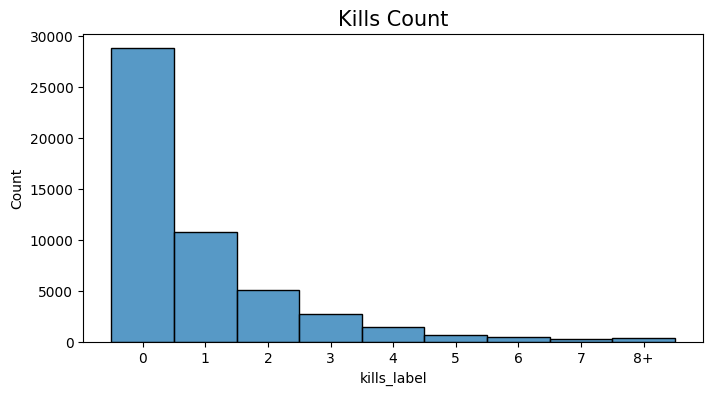

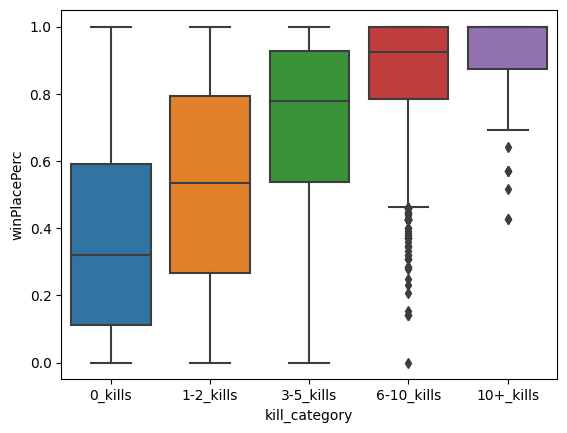

In [ ]:
squad = ["squad","squad-fpp"]
data_squad=data[data['matchType'].isin(squad) ]
plt.figure(figsize=(8,4))
sns.histplot(data_squad,x=data_squad['kills_label'].sort_values())
plt.title("Kills Count",fontsize=15)
plt.show()

sns.boxplot(x="kill_category", y="winPlacePerc", data=data_squad, order=order)
plt.show()